# Housing Market EDA and Price Prediction Project
### Objectives:
- Import the dataset
- Inspect and clean the data set
- Understand the data (correlations, heatmap)
- Visualize data
- Data transformation
- Model development
- Model evaluation/visualization
- Model refinement

## Step 1: Import Required Libraries

In [173]:
import seaborn as sns
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.preprocessing import PolynomialFeatures, StandardScaler
from sklearn.linear_model import LinearRegression, Ridge
from sklearn.pipeline import Pipeline
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import train_test_split, cross_val_score, GridSearchCV
import os
import gc
from scipy import stats
import warnings
%matplotlib inline
warnings.filterwarnings("ignore",category=UserWarning)
warnings.filterwarnings("ignore",category=FutureWarning)
sns.set(rc={'axes.facecolor':'lightblue', 'figure.facecolor':'lightgrey'})
from tqdm import tqdm

## Step 2: Import The Dataset

In [2]:
FILE_PATH = 'Housing.csv'

In [3]:
raw_data = pd.read_csv(FILE_PATH)

## Step 3: Inspect And Clean The Dataset

In [4]:
raw_data.head()

,price,area,bedrooms,bathrooms,stories,mainroad,guestroom,basement,hotwaterheating,airconditioning,parking,prefarea,furnishingstatus
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished


In [5]:
raw_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 545 entries, 0 to 544
Data columns (total 13 columns):
 #   Column            Non-Null Count  Dtype 
---  ------            --------------  ----- 
 0   price             545 non-null    int64 
 1   area              545 non-null    int64 
 2   bedrooms          545 non-null    int64 
 3   bathrooms         545 non-null    int64 
 4   stories           545 non-null    int64 
 5   mainroad          545 non-null    object
 6   guestroom         545 non-null    object
 7   basement          545 non-null    object
 8   hotwaterheating   545 non-null    object
 9   airconditioning   545 non-null    object
 10  parking           545 non-null    int64 
 11  prefarea          545 non-null    object
 12  furnishingstatus  545 non-null    object
dtypes: int64(6), object(7)
memory usage: 55.5+ KB


In [6]:
raw_data.describe()

,price,area,bedrooms,bathrooms,stories,parking
count,5.450000e+02,545.000000,545.000000,545.000000,545.000000,545.000000
mean,4.766729e+06,5150.541284,2.965138,1.286239,1.805505,0.693578
std,1.870440e+06,2170.141023,0.738064,0.502470,0.867492,0.861586
min,1.750000e+06,1650.000000,1.000000,1.000000,1.000000,0.000000
25%,3.430000e+06,3600.000000,2.000000,1.000000,1.000000,0.000000
50%,4.340000e+06,4600.000000,3.000000,1.000000,2.000000,0.000000
75%,5.740000e+06,6360.000000,3.000000,2.000000,2.000000,1.000000
max,1.330000e+07,16200.000000,6.000000,4.000000,4.000000,3.000000


In [7]:
cols = raw_data.columns

for col in cols:
    print(col,"unique values:",raw_data[col].unique(),"\n")

price unique values: [13300000 12250000 12215000 11410000 10850000 10150000  9870000  9800000
  9681000  9310000  9240000  9100000  8960000  8890000  8855000  8750000
  8680000  8645000  8575000  8540000  8463000  8400000  8295000  8190000
  8120000  8080940  8043000  7980000  7962500  7910000  7875000  7840000
  7700000  7560000  7525000  7490000  7455000  7420000  7350000  7343000
  7245000  7210000  7140000  7070000  7035000  7000000  6930000  6895000
  6860000  6790000  6755000  6720000  6685000  6650000  6629000  6615000
  6580000  6510000  6475000  6440000  6419000  6405000  6300000  6293000
  6265000  6230000  6195000  6160000  6125000  6107500  6090000  6083000
  6020000  5950000  5943000  5880000  5873000  5866000  5810000  5803000
  5775000  5740000  5652500  5600000  5565000  5530000  5523000  5495000
  5460000  5425000  5390000  5383000  5320000  5285000  5250000  5243000
  5229000  5215000  5145000  5110000  5075000  5040000  5033000  5005000
  4970000  4956000  4935000  4

### Initial inspecion of the data looks good, there are no null values. 4 fixes will be done: 
1. Cleaning headers 
2. Drop unecessary columns 
3. The conversion of yes no columns to bool 
4. Furnished status changed to ordered category

### Cleaning column headers to preferred convention

In [9]:
headers = ['price','area','no_bedrooms','no_bathrooms','no_stories','mainroad_connection','basement','guestroom','hot_water_heating','air_conditioning','no_parking_slots','prefarea','furnishing_status']
raw_data.columns = headers
raw_data

,price,area,no_bedrooms,no_bathrooms,no_stories,mainroad_connection,basement,guestroom,hot_water_heating,air_conditioning,no_parking_slots,prefarea,furnishing_status
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,yes,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,no,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,yes,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,yes,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,no,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,no,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,no,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,no,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,no,furnished


### Dropping unecessary columns

It is unclear what the prefarea is supposet to represent. Since we cannot determine whether its the buyers preferred area, seller preferred area, or general preferred area, it will be removed from the dataframe.

In [10]:
raw_data = raw_data.drop('prefarea',axis=1)
raw_data

,price,area,no_bedrooms,no_bathrooms,no_stories,mainroad_connection,basement,guestroom,hot_water_heating,air_conditioning,no_parking_slots,furnishing_status
0,13300000,7420,4,2,3,yes,no,no,no,yes,2,furnished
1,12250000,8960,4,4,4,yes,no,no,no,yes,3,furnished
2,12250000,9960,3,2,2,yes,no,yes,no,no,2,semi-furnished
3,12215000,7500,4,2,2,yes,no,yes,no,yes,3,furnished
4,11410000,7420,4,1,2,yes,yes,yes,no,yes,2,furnished
...,...,...,...,...,...,...,...,...,...,...,...,...
540,1820000,3000,2,1,1,yes,no,yes,no,no,2,unfurnished
541,1767150,2400,3,1,1,no,no,no,no,no,0,semi-furnished
542,1750000,3620,2,1,1,yes,no,no,no,no,0,unfurnished
543,1750000,2910,3,1,1,no,no,no,no,no,0,furnished


### Conversion of yes no to bool

In [11]:
yes_no_cols = ['mainroad_connection','basement','guestroom','hot_water_heating','air_conditioning']
raw_data[yes_no_cols] = raw_data[yes_no_cols].replace({'yes': True, 'no': False}).astype(bool)

### Furnished status changed to ordered category

In [12]:
raw_data['furnishing_status'] = pd.Categorical(raw_data['furnishing_status'], categories=['unfurnished', 'semi-furnished', 'furnished'], ordered=True)

## Step 4: Understand the Data (Correlations, Heatmap)

### Numerical Feature Correlation

In [39]:
from scipy.stats import pearsonr

numerical_columns = ['price', 'area', 'no_bedrooms', 'no_bathrooms', 'no_stories']

results = []

for feature in numerical_columns:
    if feature != 'price':  
        correlation, p_value = pearsonr(raw_data_encoded['price'], raw_data_encoded[feature])
        results.append({'Feature': feature, 'Correlation': correlation, 'P-value': p_value})

results_df = pd.DataFrame(results)

results_df.sort_values(by=['Correlation','P-value'],ascending=False)

,Feature,Correlation,P-value
0,area,0.535997,7.388225e-42
2,no_bathrooms,0.517545,1.139322e-38
3,no_stories,0.420712,8.668397e-25
1,no_bedrooms,0.366494,9.080302e-19


### Bool Feature Correlation

In [24]:
from scipy.stats import pointbiserialr

target = 'price'
features = ['mainroad_connection','basement','guestroom','hot_water_heating','air_conditioning']

results = []

for feature in features:
    correlation, p_value = pointbiserialr(raw_data[feature], raw_data[target])
    results.append({'Feature': feature, 'Correlation': correlation, 'P-value': p_value})

correlation_results = pd.DataFrame(results)
correlation_results.sort_values(by=['Correlation', 'P-value'],ascending=False)

,Feature,Correlation,P-value
4,air_conditioning,0.452954,6.310970e-29
0,mainroad_connection,0.296898,1.490104e-12
1,basement,0.255517,1.429114e-09
2,guestroom,0.187057,1.104105e-05
3,hot_water_heating,0.093073,2.981524e-02


### Categorical Correlations

In [35]:
raw_data_encoded = pd.get_dummies(raw_data, columns=['furnishing_status'], drop_first=False)

raw_data_encoded[['furnishing_status_semi-furnished', 'furnishing_status_furnished','furnishing_status_unfurnished', 'price']].corr().sort_values(by='price',ascending=False)

,furnishing_status_semi-furnished,furnishing_status_furnished,furnishing_status_unfurnished,price
price,0.063656,0.229350,-0.280587,1.000000
furnishing_status_furnished,-0.496748,1.000000,-0.409462,0.229350
furnishing_status_semi-furnished,1.000000,-0.496748,-0.588405,0.063656
furnishing_status_unfurnished,-0.588405,-0.409462,1.000000,-0.280587


### Feature Importance Heatmap

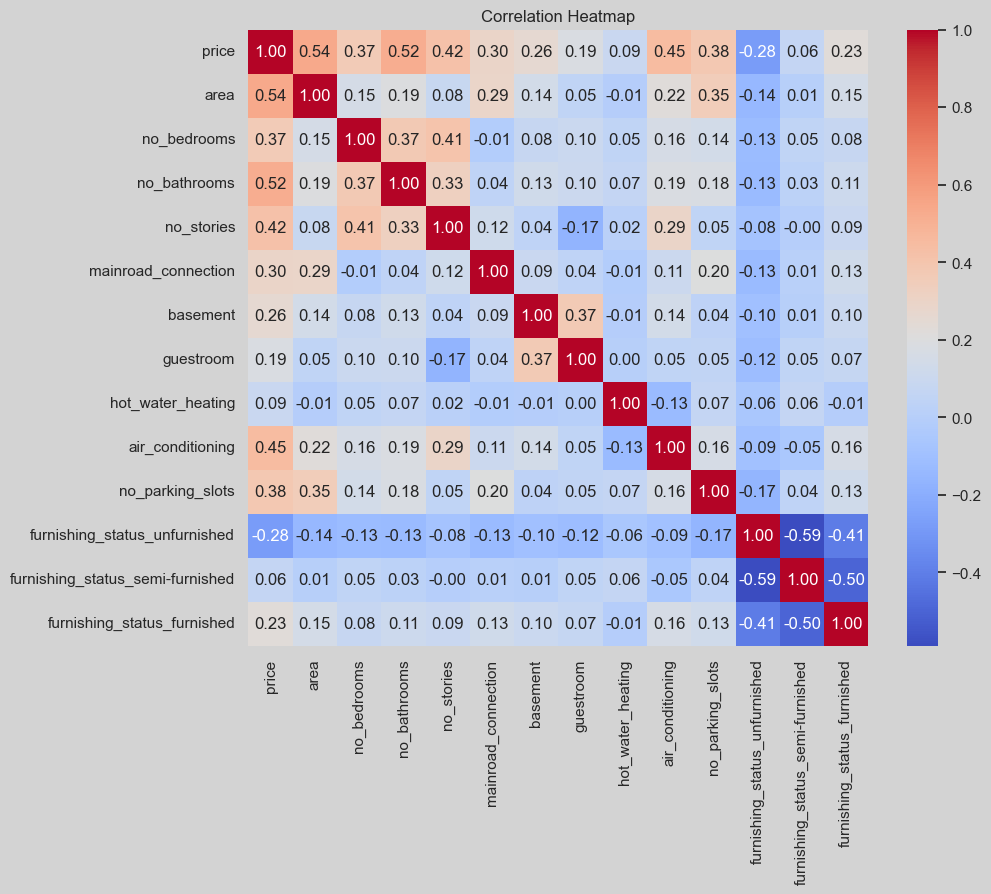

In [151]:
correlation_matrix = raw_data_encoded.corr()

plt.figure(figsize=(10, 8)) 

sns.heatmap(correlation_matrix, annot=True, cmap='coolwarm', fmt='.2f')

plt.title('Correlation Heatmap')
plt.show()

## Correlation Analysis Conclusions:
- Features: area, number of bathrooms, number of stories, air conditioning, and parking slots have the strongest positive correlation with price.
- Features: unfurnished status is negatively correlated with price
- Features: semi-firnished, firnished, hot water heating, guestroom, and basement have the least effect on price

## Step 5: Visualize Data


In [102]:
raw_data.head()
raw_data.columns

Index(['price', 'area', 'no_bedrooms', 'no_bathrooms', 'no_stories',
       'mainroad_connection', 'basement', 'guestroom', 'hot_water_heating',
       'air_conditioning', 'no_parking_slots', 'furnishing_status'],
      dtype='object')

In [103]:
all_columns = ['price', 'area', 'no_bedrooms', 'no_bathrooms', 'no_stories',
       'mainroad_connection', 'basement', 'guestroom', 'hot_water_heating',
       'air_conditioning', 'no_parking_slots', 'furnishing_status']

distribution_columns = ['price', 'area']

count_columns = ['no_bedrooms', 'no_bathrooms', 'no_stories', 'no_parking_slots']

categorical_columns = 'furnishing_status'

bool_columns = ['mainroad_connection', 'basement', 'guestroom', 'hot_water_heating','air_conditioning']

target='price'

In [222]:
def distribution_plot(df,column):
    
    plt.figure(figsize=(8, 6))
    sns.histplot(df[column], bins=40, kde=True)

    plt.title(f'Distribution of {column.title()}', fontsize=16)
    plt.xlabel(column, fontsize=12)
    plt.ylabel('Frequency', fontsize=12)

    plt.show()

def boxplot(df,column,target):
    plt.figure(figsize=(8, 6))
    sns.boxplot(x=column, y=target, data=df,palette='Set1')

    plt.title(f'{column} Category Distribution', fontsize=16)
    plt.xlabel(column+' Categories', fontsize=12)
    plt.ylabel(target.title(), fontsize=12)
    plt.show()

def scatter_plot(df,xcol,ycol,hue=None):
    plt.figure(figsize=(8, 6))
    if hue == None:
        sns.scatterplot(x=xcol, y=ycol, data=df)
    else:
        sns.scatterplot(x=xcol, y=ycol, data=df, hue=hue, palette='Set1')

    plt.title(f'{xcol.title()} And {ycol.title()} Scatter Plot', fontsize=16)
    plt.xlabel(xcol.title(), fontsize=12)
    plt.ylabel(ycol.title(), fontsize=12)
    plt.show()

def pair_plot(df,columns):
    sns.pairplot(df[columns])
    plt.show()

def bar_plot(df,xcol,ycol):
    plt.figure(figsize=(8, 6))
    
    sns.barplot(x=xcol, y=ycol, data=df, palette='Set1')

    plt.xlabel(xcol.title(), fontsize=12)
    plt.ylabel(ycol.title(), fontsize=12)
    plt.show()

def count_plot(df,column):
    plt.figure(figsize=(8, 6))
    
    sns.countplot(data=df,x=column, palette='Set1').set_title(f"Count of {column.title()}")

    plt.xlabel(column.title(), fontsize=12)
    plt.ylabel("Count", fontsize=12)
    plt.show()

def violin_plot(df,xcol,ycol):
    plt.figure(figsize=(8, 6))
    
    sns.violinplot(x=xcol, y=ycol, data=raw_data_encoded)

    plt.xlabel(xcol.title(), fontsize=12)
    plt.ylabel(ycol.title(), fontsize=12)
    plt.show()   

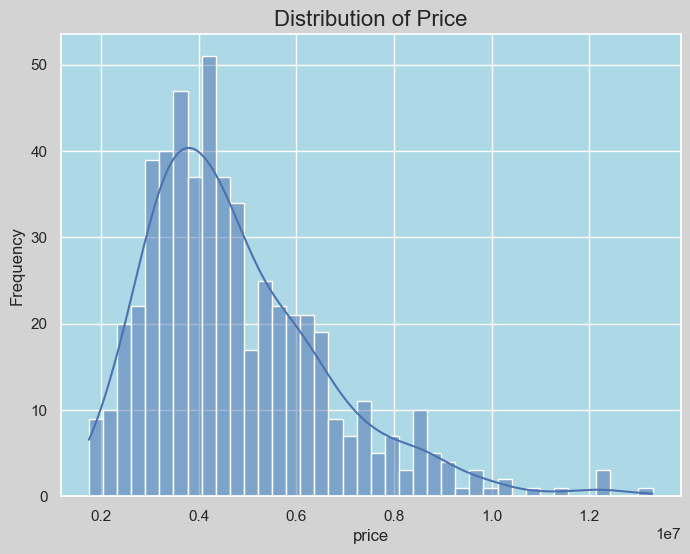

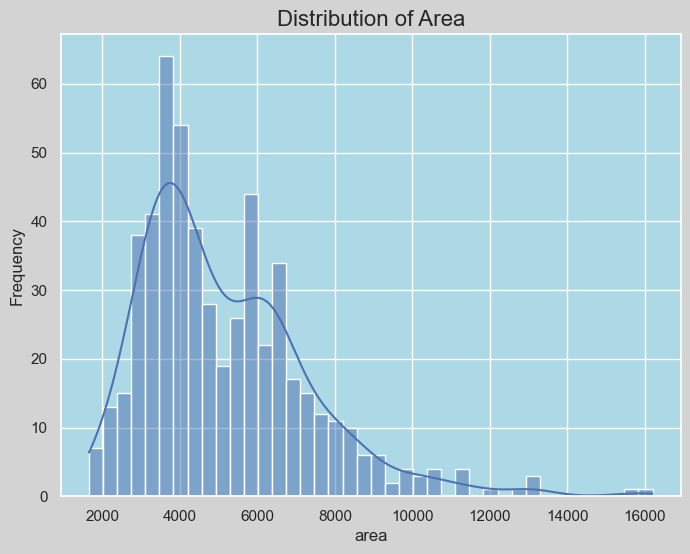

In [152]:
for col in distribution_columns:
    distribution_plot(raw_data,col)

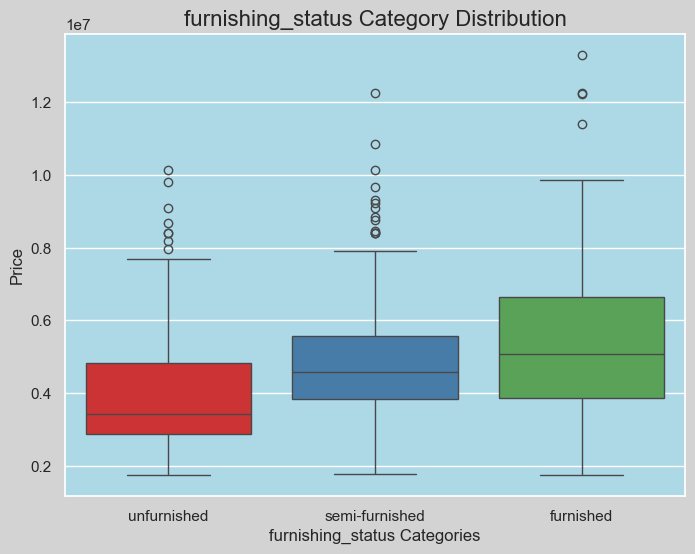

In [140]:
boxplot(raw_data,categorical_columns,target)

### Evidence of some outliers shown here

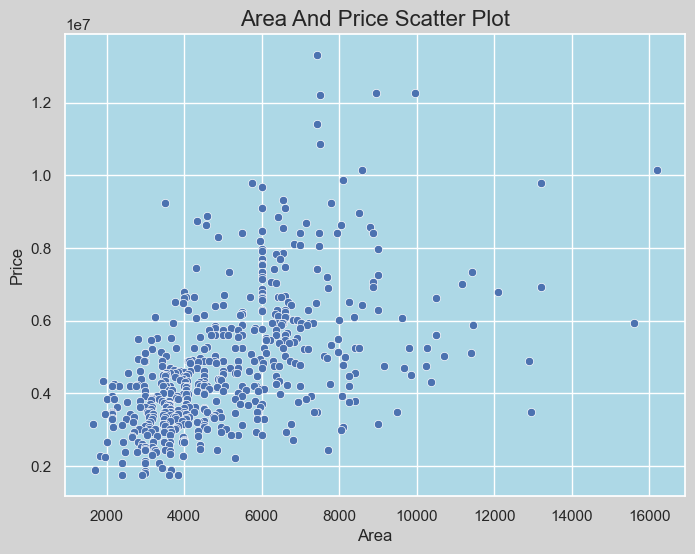

In [139]:
scatter_plot(raw_data, 'area','price')

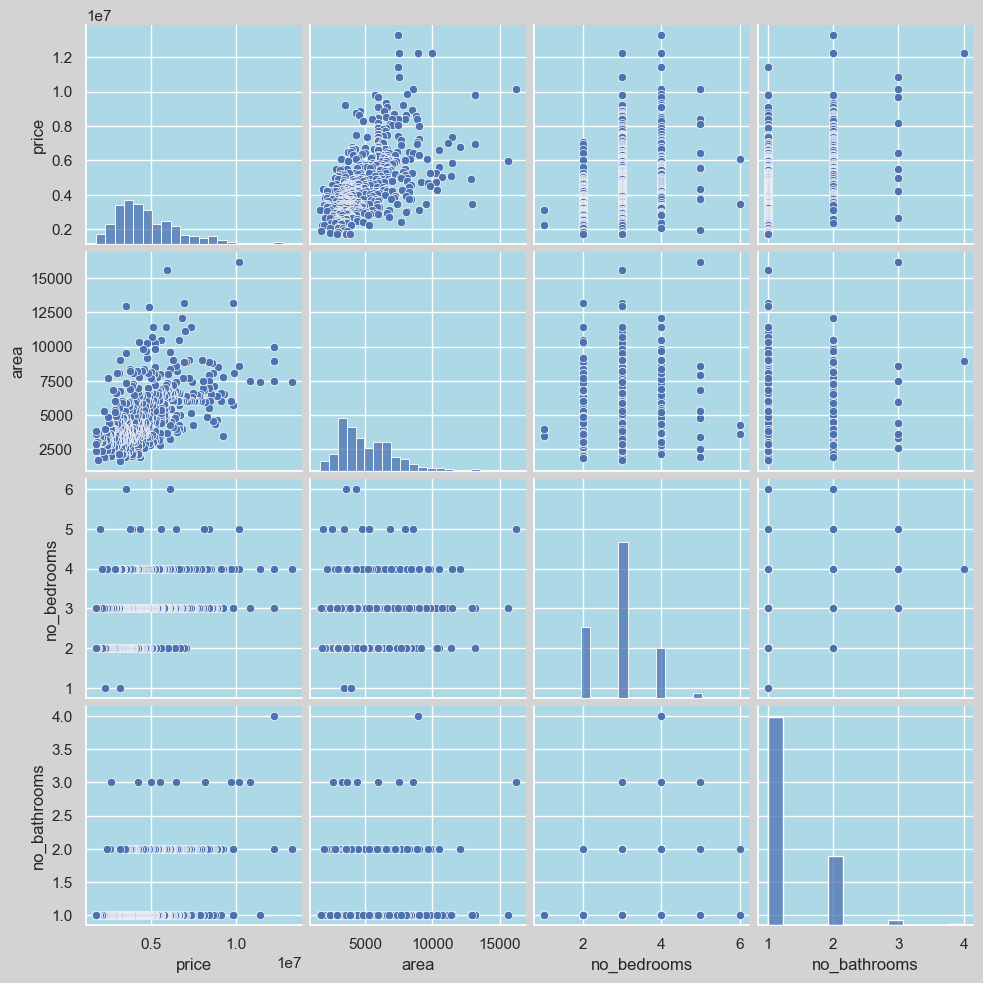

In [141]:
pair_plot(raw_data,['price', 'area', 'no_bedrooms', 'no_bathrooms'])

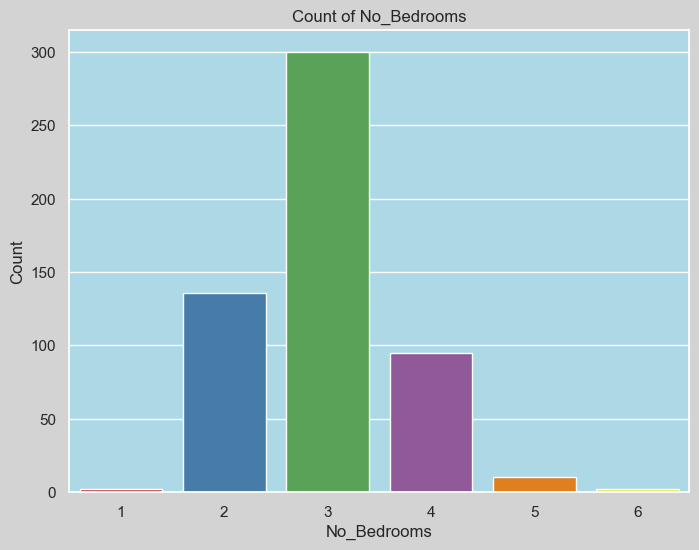

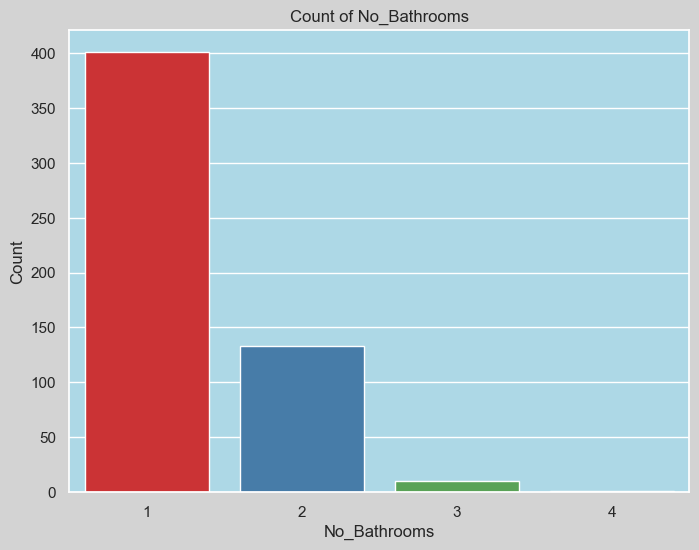

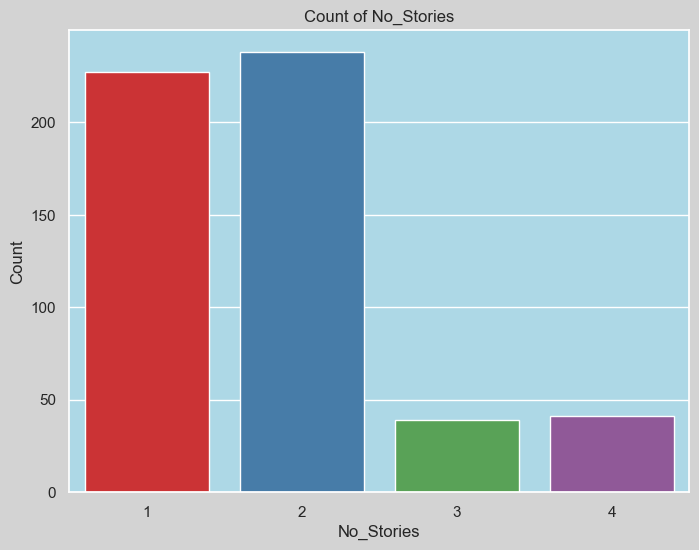

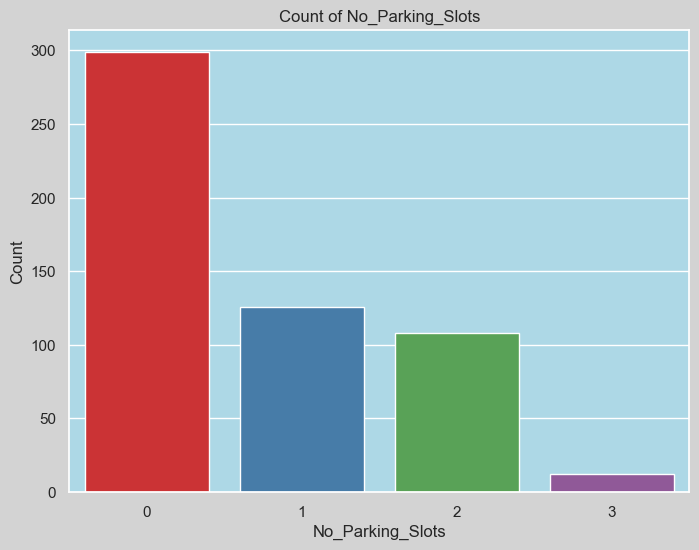

In [144]:
for cols in count_columns:
    count_plot(raw_data,cols)

### Uneven distribution shown here between feature frequencies

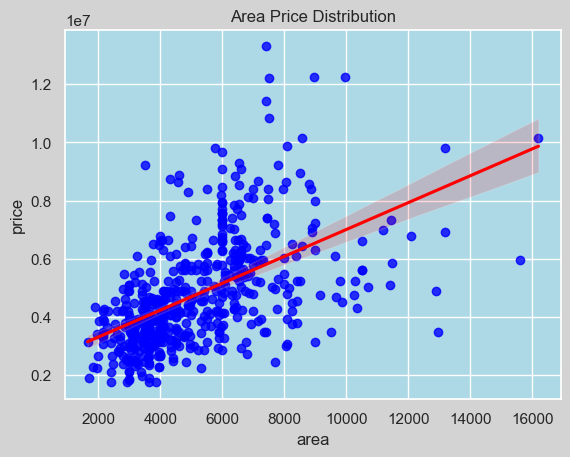

In [145]:
sns.regplot(x='area',y='price', data=raw_data,scatter_kws={'color': 'blue'},line_kws={'color': 'red'}).set_title("Area Price Distribution")
plt.show()

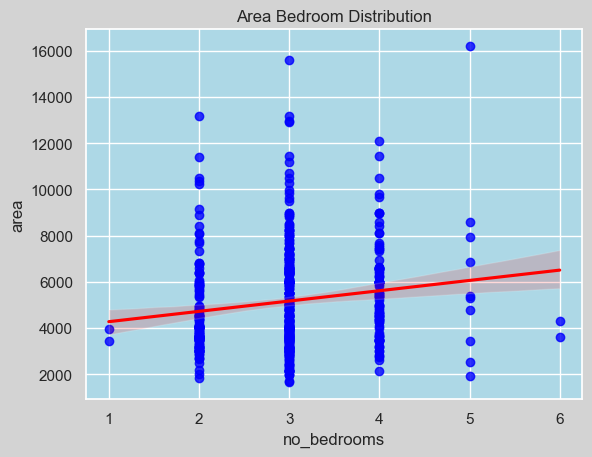

In [146]:
sns.regplot(x='no_bedrooms',y='area', data=raw_data,scatter_kws={'color': 'blue'},line_kws={'color': 'red'}).set_title("Area Bedroom Distribution")
plt.show()

## Step 6: Model Creation

### Initial Model will be standard multiple linear regression

In [193]:
x_data = raw_data_encoded.drop('price', axis=1)
y_data = raw_data_encoded['price']

x_train, x_test, y_train, y_test = train_test_split(x_data, y_data, test_size = 0.4, random_state=1)

print("number of test samples :", x_test.shape[0])
print("number of training samples:",x_train.shape[0])

number of test samples : 218
number of training samples: 327


In [201]:
lm = LinearRegression()
lm.fit(x_train,y_train)
y_hat = lm.predict(x_test)

In [202]:
print(r2_score(y_test,y_hat))

0.6446603364067631


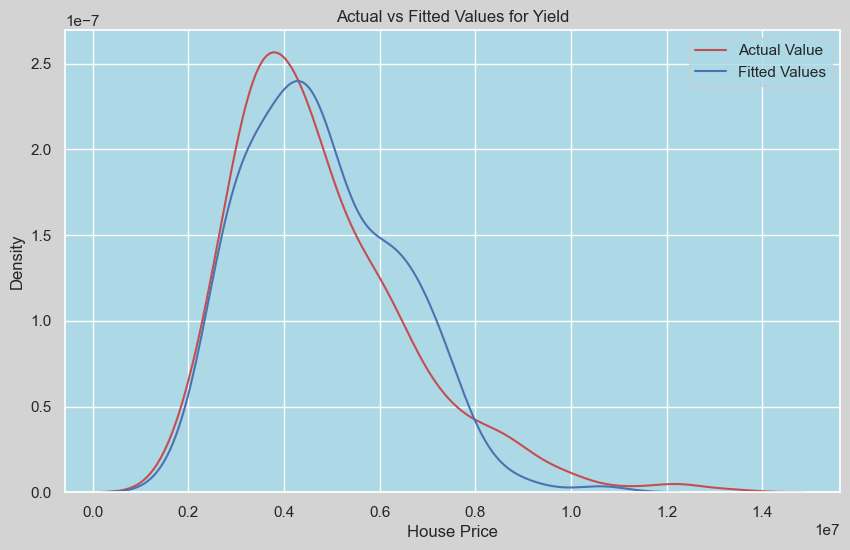

In [203]:
plt.figure(figsize=(10, 6))
ax1 = sns.distplot(raw_data_encoded['price'], hist=False, color="r", label="Actual Value")
sns.distplot(y_hat, hist=False, color="b", label="Fitted Values" , ax=ax1)

plt.title('Actual vs Fitted Values for Yield')
plt.xlabel('House Price')
plt.ylabel('Density')
plt.legend()
plt.show()

### Initial model performs well but is not able to fully grasp the trend. The model is showing some signs of over fitting.

## Step 7: Model Evaluation and Refinement:

### Polynomial Feature Degree test:

In [280]:
lr_test = LinearRegression()
R2_test = []
order = [1, 2, 3, 4, 5]
for n in order:
    pr = PolynomialFeatures(degree=n)
    x_train_pr = pr.fit_transform(x_train)
    x_test_pr = pr.fit_transform(x_test)    
    lr_test.fit(x_train_pr, y_train)
    R2_test.append(lr_test.score(x_test_pr, y_test))

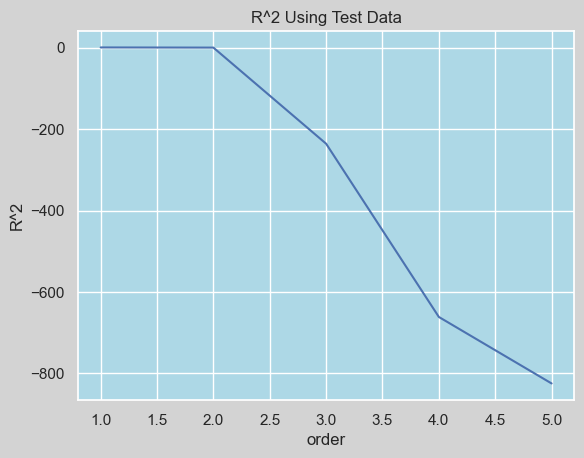

In [281]:
plt.plot(order, R2_test)
plt.xlabel('order')
plt.ylabel('R^2')
plt.title('R^2 Using Test Data') 
plt.show()

### Alpha value test:

In [225]:
pr_test=PolynomialFeatures(degree=2)
x_train_pr=pr_test.fit_transform(x_train)
x_test_pr=pr_test.fit_transform(x_test)

In [282]:
R2_test = []
R2_train = []
Alpha = np.arange(0.001,1,0.001)
pbar = tqdm(Alpha)

for alpha in pbar:
    RigeModel = Ridge(alpha=alpha) 
    RigeModel.fit(x_train_pr, y_train)
    test_score, train_score = RigeModel.score(x_test_pr, y_test), RigeModel.score(x_train_pr, y_train)
    pbar.set_postfix({"Test Score": test_score, "Train Score": train_score})
    R2_test.append(test_score)
    R2_train.append(train_score)

100%|██████████| 999/999 [00:51<00:00, 19.37it/s, Test Score=0.319, Train Score=0.398]


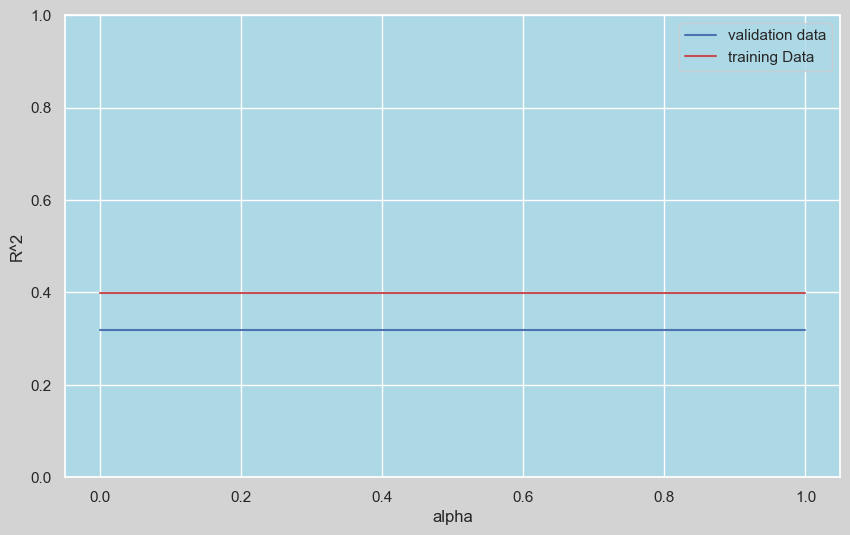

In [283]:
plt.figure(figsize=(10, 6))  
plt.plot(Alpha, R2_test, label='validation data')
plt.plot(Alpha, R2_train, 'r', label='training Data')
plt.xlabel('alpha')
plt.ylabel('R^2')
plt.ylim(0, 1)
plt.legend()
plt.show()

### Grid Search Test:

In [284]:
alpha_params = [{'alpha': [0.0001,0.001,0.01, 0.1, 1, 10]}]

In [285]:
ridge_test=Ridge()
grid_test = GridSearchCV(ridge_test, alpha_params,cv=4)

In [286]:
grid_test.fit(x_train, y_train)

GridSearchCV(cv=4, estimator=Ridge(),
             param_grid=[{'alpha': [0.0001, 0.001, 0.01, 0.1, 1, 10]}])

In [287]:
BestRR=grid_test.best_estimator_
print(BestRR)
print(BestRR.score(x_test, y_test))

Ridge(alpha=1)
0.6450400472284192


### Model Creation With Optimal Parameters

In [232]:
pr_opt = PolynomialFeatures(degree=2)
RidgeModelOPT = Ridge(alpha=1)

x_train_pr_opt = pr_opt.fit_transform(x_train)
x_test_pr_opt = pr_opt.fit_transform(x_test)

RidgeModelOPT.fit(x_train_pr_opt, y_train)
y_hat_opt = RidgeModelOPT.predict(x_test_pr_opt)


C:\Users\ecumm\anaconda3\envs\datascience\Lib\site-packages\sklearn\linear_model\_ridge.py:216: LinAlgWarning: Ill-conditioned matrix (rcond=1.48761e-18): result may not be accurate.
  return linalg.solve(A, Xy, assume_a="pos", overwrite_a=True).T


In [233]:
print(r2_score(y_test,y_hat_opt))

0.642173091859123


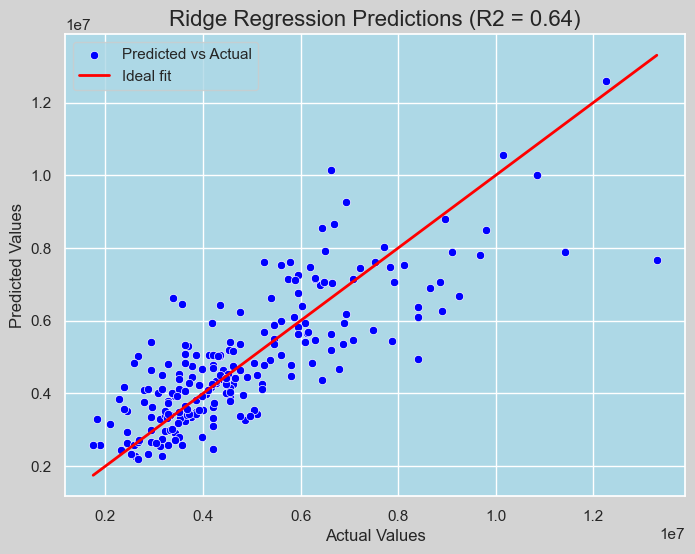

In [234]:
plt.figure(figsize=(8, 6))
sns.scatterplot(x=y_test, y=y_hat_opt, color='blue', label="Predicted vs Actual")

plt.plot([y_test.min(), y_test.max()], [y_test.min(), y_test.max()], color='red', lw=2, label="Ideal fit")

plt.title(f"Ridge Regression Predictions (R2 = {r2_score(y_test, y_hat_opt):.2f})", fontsize=16)
plt.xlabel("Actual Values", fontsize=12)
plt.ylabel("Predicted Values", fontsize=12)
plt.legend()

plt.show()

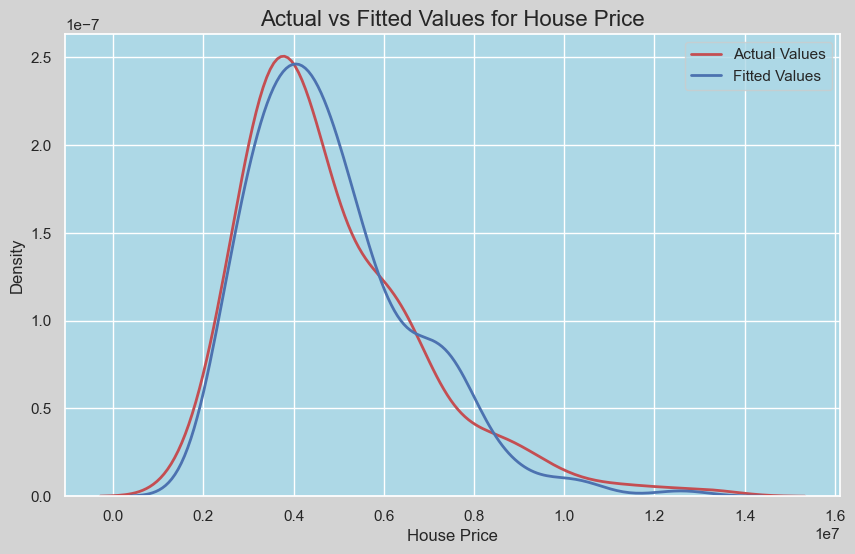

In [235]:
plt.figure(figsize=(10, 6))

ax1 = sns.kdeplot(y_test, color="r", label="Actual Values", lw=2)

sns.kdeplot(y_hat_opt, color="b", label="Fitted Values", lw=2, ax=ax1)

plt.title('Actual vs Fitted Values for House Price', fontsize=16)
plt.xlabel('House Price', fontsize=12)
plt.ylabel('Density', fontsize=12)

plt.legend()
plt.show()

## Conclusions:
- Model shows less overfitting but still not grasping the trend
- r2 score remained around the same

## Next Steps:
- remove outliers
- scale down large numbers
- cross validation
- pipeline

### Filtering Outliers

In [238]:
numeric_data = raw_data_encoded.select_dtypes(include=[np.number])

Q1 = numeric_data.quantile(0.25)
Q3 = numeric_data.quantile(0.75)

IQR = Q3 - Q1

filter = (numeric_data >= (Q1 - 1.5 * IQR)) & (numeric_data <= (Q3 + 1.5 * IQR))

filtered_data = raw_data_encoded[filter.all(axis=1)]

print(f"Original Data Shape: {raw_data_encoded.shape}")
print(f"Filtered Data Shape: {filtered_data.shape}")

Original Data Shape: (545, 14)
Filtered Data Shape: (463, 14)


### Pipeline Creation to Implement Scale and Streamline Process

In [288]:
Input=[('scale',StandardScaler()), ('polynomial', PolynomialFeatures(degree=2,include_bias=False)), ('model',Ridge(alpha=10))]
pipe=Pipeline(Input)
z=filtered_data.drop('price',axis=1)
y = filtered_data['price']
pipe.fit(z,y)
ypipe=pipe.predict(z)

print('pipeline R2: ', r2_score(y, ypipe))

pipeline R2:  0.7158813239485265


In [289]:
cv_scores = cross_val_score(pipe, z, y, cv=5) 

print("Cross-Validation Scores:", cv_scores)
print("Average Cross-Validation Score:", cv_scores.mean())

Cross-Validation Scores: [ -4.25835742 -10.19469896 -27.01258629 -24.78995448 -10.02199708]
Average Cross-Validation Score: -15.255518848185986


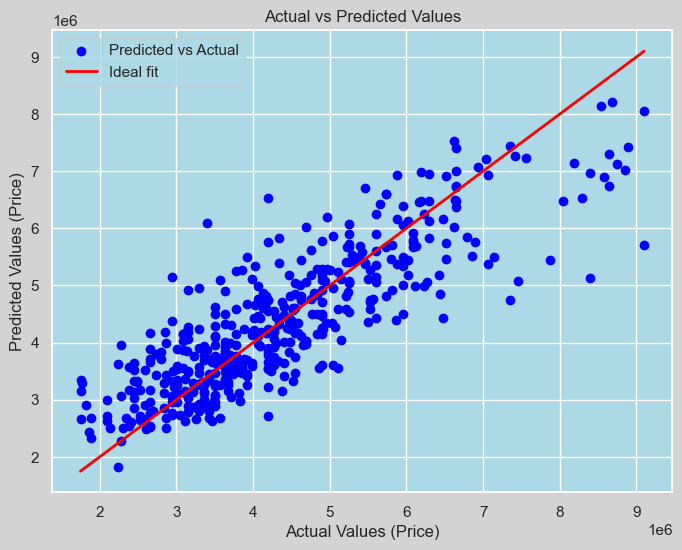

In [290]:
plt.figure(figsize=(8, 6))
plt.scatter(y, ypipe, color='blue', label='Predicted vs Actual')
plt.plot([y.min(), y.max()], [y.min(), y.max()], color='red', linewidth=2, label='Ideal fit') 
plt.title('Actual vs Predicted Values')
plt.xlabel('Actual Values (Price)')
plt.ylabel('Predicted Values (Price)')
plt.legend()
plt.show()

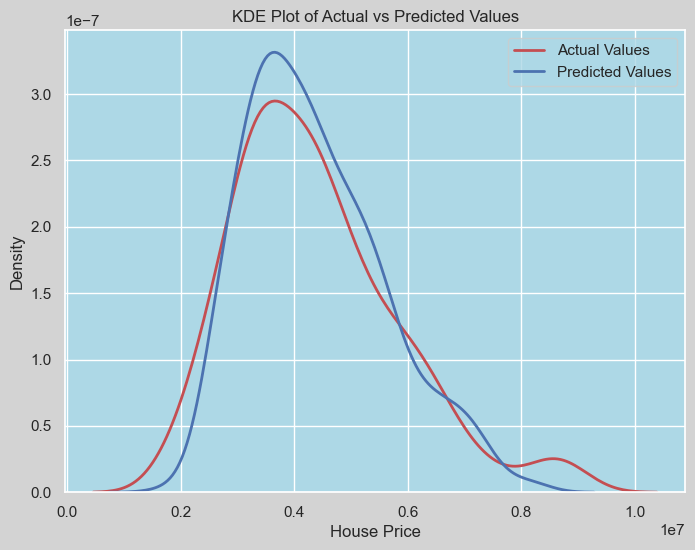

In [291]:
plt.figure(figsize=(8, 6))
sns.kdeplot(y, color='r', label='Actual Values', lw=2)
sns.kdeplot(ypipe, color='b', label='Predicted Values', lw=2)
plt.title('KDE Plot of Actual vs Predicted Values')
plt.xlabel('House Price')
plt.ylabel('Density')
plt.legend()
plt.show()

### Hyperparameter Tuning:

In [278]:
param_grid = {
    'polynomial__degree': [1, 2, 3, 4],  
    'model__alpha': [0.001, 0.1, 1, 10]      
}

grid_search = GridSearchCV(pipe, param_grid, cv=5, scoring='r2')
grid_search.fit(z, y)

print("Best parameters found:", grid_search.best_params_)
print("Best cross-validation R2 score:", grid_search.best_score_)

Best parameters found: {'model__alpha': 10, 'polynomial__degree': 1}
Best cross-validation R2 score: -10.511187797162668


## Conclusions:
- The initial pipeline performed well reaching a R2 of 0.716
- upon inspecion of cross validation scores it performed extremly poor, showing that it performs worse than a model which just guesses the mean

## Nexts Steps:
- Feature engineering
- Adjusting for multicollinearity between features
- Dropping unecessary features